In [328]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from typing import Dict
from tqdm import tqdm
import numpy as np
#import seaborn as sns
import pandas as pd
import plotnine
#import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Stopwords currently used from nltk, but custom list would be better (e.g. top 1000 ASR'd words)
import nltk 
nltk.download('stopwords') #<-  Likely need this
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['unk', 'NULL'])
additional_stop = [x[0] for x in [('unk', 74533), ('NULL', 35761), ('the', 3587), ('and', 2949), ('a', 2806), ('to', 2685), ('in', 2103), ('you', 1960), ('or', 1860), ('one', 1712), ('it', 1587), ('on', 1477), 
                                  ('for', 1394), ('that', 1317), ('three', 1312), ('like', 1165), ('oh', 1163), 
                                  ('hundred', 1096), ('of', 1087), ('yeah', 1057), ('uh', 970), ('they', 962),
                                  ('i', 959), ('know', 945), ('right', 938), ('five', 895), ('so', 783), ('here', 766),
                                  ('are', 698), ('is', 690), ('two', 686), ('well', 680), ('h', 679), ('be', 650), 
                                  ('our', 638), ('hi', 609), ('them', 602), ('out', 601), ('he', 594), ('p', 564), 
                                  ('its', 548), ('do', 544), ('then', 543), ('now', 510), ('l', 510), ('e', 503), 
                                  ('no', 496), ('with', 495), ('me', 480), ('who', 476), ('my', 469), ('there', 462), 
                                  ('seven', 451), ('six', 448), ('man', 440), ('seventy', 436), ('thousand', 424), 
                                  ('fifty', 424), ('r', 416), ('sixty', 407), ('had', 405), ('which', 403), ('noise', 402),
                                  ('nineteen', 400), ('nine', 398), ('eight', 397), ('at', 397), ('thirty', 396),
                                  ('this', 396), ('up', 396), ('w', 396), ('over', 390), ('by', 388), ('um', 384), 
                                  ('not', 381), ('non', 375), ('too', 370), ('four', 369), ('an', 366), ('their', 365), 
                                  ('as', 361), ('men', 360), ('she', 356), ('twenty', 352), ('theyre', 350), 
                                  ('him', 345), ('his', 345), ('time', 344), ('have', 340), ('did', 334), 
                                  ('quote', 329), ('n', 327), ('first', 325), ('after', 324), ('point', 324), 
                                  ('forty', 324), ('thats', 322), ('from', 321), ('down', 317)]]
stop_words.extend(additional_stop)
print(len(stop_words), len(set(stop_words)))
stop_words = list(set(stop_words))
stop_words[:5]

278 225


[nltk_data] Downloading package stopwords to
[nltk_data]     /cliphomes/dpeskov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['ve', "don't", "couldn't", 'herself', 'noise']

In [4]:
#function to calculate how often a term maps to junk.  Normalized by # of junk words, as each one adds up to 100%
def get_junk_translations(term: str, tpm: Dict[str, Dict[str, float]]) -> float:
    stopwords = stop_words
    total = 0.0
    count = 0
    for alignment in stopwords:
        if alignment in tpm[term]:
          #  count += 1
            total += tpm[term][alignment]
   #if count != 0:    
        #total = total/count
    return total

#read the translation matrix.  Precomputed with Gyza.
def read_translation_probability_matrix(fp) -> Dict[str, Dict[str, float]]:
    probabilities = defaultdict(lambda: defaultdict(float))
    for line in tqdm(fp):
        w1, w0, prob = line.strip().split()
        probabilities[w0][w1] = float(prob)
    return probabilities
    
lex_file = '/fs/clip-scratch/yogarshi/qanta-joe/align-try2/train/lex.f2e'

with open('/fs/clip-scratch/yogarshi/qanta-joe/align-try2/sentences.txt.cln') as fp:
    data = [l for l in fp]
    
tpm = read_translation_probability_matrix(open(lex_file))

1121202it [00:03, 314191.09it/s]


In [5]:
c = CountVectorizer()

# fit_transform returns a scipy sparse matrix of dimensions:
#  (number_of_documents, vocab_size)
fitted = c.fit_transform(data)
term_frequencies = np.array(fitted.sum(0)[0])

vocab = ['']*len(c.vocabulary_.keys())
for word, ix in c.vocabulary_.items():
    vocab[ix] = word

array_of_junk_translations = np.array([
    get_junk_translations(term, tpm) for term in tqdm(vocab)
])

100%|██████████| 259798/259798 [00:05<00:00, 49909.38it/s]


In [6]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, hold=hold, **kwargs)

In [6]:
print(vocab[50005:50025])

print(tpm['coalesce'])
array_of_junk_translations[50005:50025]

['coalcreating', 'coaldealer', 'coalemus', 'coalesce', 'coalesced', 'coalescence', 'coalescent', 'coalesces', 'coalescing', 'coalexporting', 'coalfield', 'coalfields', 'coalforming', 'coalheatedtongs', 'coalhouse', 'coaling', 'coalisland', 'coalition', 'coalitional', 'coalitionbuilding']
defaultdict(<class 'float'>, {'parent': 0.1111111, 'NULL': 0.1111111, 'cold': 0.1111111, 'unk': 0.2222222, 'lasts': 0.1111111, 'bicycle': 0.1111111, 'have': 0.1111111, 'immediately': 0.1111111})


array([0.       , 0.       , 1.       , 0.4444444, 0.5714286, 0.6      ,
       0.5      , 0.       , 0.5      , 0.       , 0.       , 0.5      ,
       1.       , 0.6666666, 0.1363636, 0.75     , 0.       , 0.0278745,
       1.       , 0.3333333])

In [7]:
count, correct_count, one_count = 0, 0, 0
select_term_frequencies = []
select_array_of_junk_translations = []
select_vocab = []

for ix, word in enumerate(vocab):
    if tpm[word]:
        if max(tpm[word], key=tpm[word].get) == word:
            correct_count +=1
            pass
            #print(tpm[word], word)
        else:
            if term_frequencies[0][ix] > 1:
                select_vocab.append(word)
                select_term_frequencies.append(term_frequencies[0][ix])
                select_array_of_junk_translations.append(array_of_junk_translations[ix])
            else:
                one_count+=1
            #print(tpm[word], word)
    else:
        count +=1
print(f"Issues with {count} vocab")
print(f"Removed {correct_count} self-matching words")   
print(f"Removed {one_count} words that occur once")   

Issues with 2897 vocab
Removed 19596 self-matching words
Removed 133077 words that occur once


In [198]:
sum([item for item in select_array_of_junk_translations if item > .75])#/len(select_array_of_junk_translations)

19970.7554908994

In [62]:
#from plotnine import *
#from plotnine.data import *


In [416]:
bins = [ 0, .25, .50, .75, 1.001]
df = pd.DataFrame({'Word_Log_Term_Frequency': np.log(select_term_frequencies), 'Probability_of_Being_Mapped_to_Junk':select_array_of_junk_translations, 'txt':[(txt +'\n'+ max(tpm[txt], key=tpm[txt].get)) for txt in select_vocab]})
df['binned'] = pd.cut(df['Probability_of_Being_Mapped_to_Junk'], bins,  right = True, include_lowest=True)
df['binned_x'] = pd.cut(df['Word_Log_Term_Frequency'], [0, 1, 3, 5, 12], include_lowest=True)

In [411]:
#sample = sample.drop('binned_x', axis = 0)

sample

,binned_x,level_1,Word_Log_Term_Frequencyextra,Probability_of_Being_Mapped_to_Junkextra,txtextra,binnedextra,binned_xextra
0,"(-0.001, 1.0]",99374,0.693147,0.666667,villis\nassassinate,"(0.5, 0.75]","(-0.001, 1.0]"
1,"(1.0, 3.0]",54694,1.945910,0.000000,lineitem\nitem,"(-0.001, 0.25]","(1.0, 3.0]"
2,"(3.0, 5.0]",99920,3.178054,0.551724,vorticity\nunk,"(0.5, 0.75]","(3.0, 5.0]"
3,"(5.0, 12.0]",71832,5.472271,0.471338,photons\nunk,"(0.25, 0.5]","(5.0, 12.0]"


In [419]:
#sample = sample.add_suffix('').reset_index()
sample

,,Word_Log_Term_Frequency,Probability_of_Being_Mapped_to_Junk,txt,binned,binned_x
0,10799,0.693147,0.600000,basidomycota\nto,"(0.5, 0.75]","(-0.001, 1.0]"
1,13806,2.302585,0.666667,bong\nunk,"(0.5, 0.75]","(1.0, 3.0]"
2,69284,3.367296,0.529412,palmyra\nunk,"(0.5, 0.75]","(3.0, 5.0]"
3,75111,7.455877,0.074263,protagonists\nprotagonist,"(-0.001, 0.25]","(5.0, 12.0]"


In [428]:

#sample.binned.unique

In [488]:
sample

Word_Log_Term_Frequency  Probability_of_Being_Mapped_to_Junk  \
0 95997                  0.693147                             1.000000   
  70383                  0.693147                             0.500000   
  104216                 0.693147                             0.500000   
  43328                  0.693147                             0.428571   
  100039                 0.693147                             1.000000   
  23663                  0.693147                             1.000000   
  36802                  0.693147                             0.666667   
  5685                   0.693147                             0.500000   
  19903                  0.693147                             0.000000   
  6982                   0.693147                             1.000000   
1 71517                  1.386294                             0.800000   
  103902                 2.197225                             0.909091   
  70920                  1.098612                             0.000000   
  20442                  1.098612                             1.000000   
  102618                 1.386294                             1.000000   
  52313                  1.609438                             0.714286   
  10219                  2.197225                             0.666667   
  60265                  1.098612                             0.000000   
  31725                  2.564949                             0.800000   
  42553                  1.098612                             0.333333   
2 88961                  4.330733                             0.038462   
  44626                  4.828314                             0.577922   
  73980                  4.700480                             0.507692   
  27110                  3.891820                             0.102041   
  87329                  4.248495                             0.270270   
  53092                  3.295837                             0.696970   
  24655                  3.465736                             0.348837   
  13678                  3.912023                             0.616667   
  35686                  3.091042                             0.484849   
  87222                  4.189655                             0.241379   
3 72871                  5.247024                             0.287879   
  70200                  7.476472                             0.547760   
  83014                  5.743003                             0.445141   
  21509                  5.198497                             0.680000   
  36072                  6.075346                             0.592369   
  42780                  5.081404                             0.591716   
  31783                  5.273000                             0.504587   
  25247                  6.159095                             0.140461   
  38824                  7.521859                             0.089247   
  13996                  5.141664                             0.539267   

                                       txt          binned       binned_x  
0 95997                         tsst1\none   (0.75, 1.001]  (-0.001, 1.0]  
  70383                        peals\nNULL     (0.25, 0.5]  (-0.001, 1.0]  
  104216                        炤nal\nNULL     (0.25, 0.5]  (-0.001, 1.0]  
  43328                           hilma\na     (0.25, 0.5]  (-0.001, 1.0]  
  100039                         vyavo\nto   (0.75, 1.001]  (-0.001, 1.0]  
  23663                        cuervo\nunk   (0.75, 1.001]  (-0.001, 1.0]  
  36802                        galeta\nunk     (0.5, 0.75]  (-0.001, 1.0]  
  5685                       amours\nahead     (0.25, 0.5]  (-0.001, 1.0]  
  19903          circumvents\ncircumstance  (-0.001, 0.25]  (-0.001, 1.0]  
  6982                            aoide\nl   (0.75, 1.001]  (-0.001, 1.0]  
1 71517                   phenocrysts\nunk   (0.75, 1.001]     (1.0, 3.0]  
  103902                       zircon\nunk   (0.75, 1.001]     

In [540]:
def get_labels(df):
    sample = df.groupby('binned_x', as_index= False).apply(lambda df: df.sample(100))
    sample_dict = {}
    count = 0
    for ix, item in sample.iterrows():
        #print(item)
        if (item[4] in sample_dict.keys()):
            if item[3] in sample_dict[item[4]]:
                pass
            else: 
                sample_dict[item[4]].update({item[3]:count})
        else:
            sample_dict[item[4]] = {item[3]:count}
        count+=1

    candidates = []
    for keys in sample_dict.keys():
        for a in  sample_dict[keys].keys():
            candidates.append(sample_dict[keys][a])

    labels = sample.iloc[candidates]
    return labels

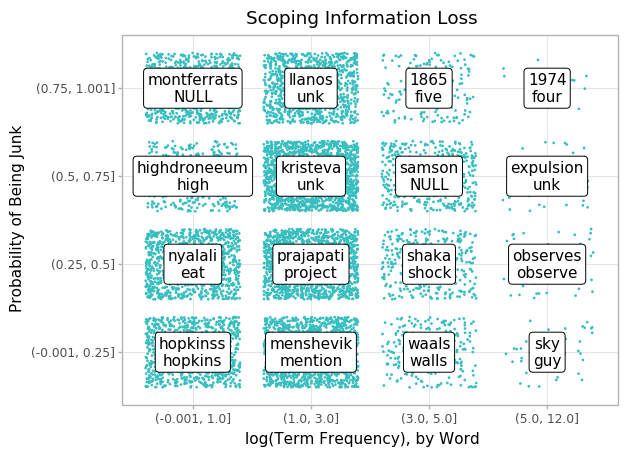

<ggplot: (8740168959794)>

In [545]:
df = df.sample(10000)
labels = get_labels(df)
#sample = df.sample(10, axis = 1)

p = ggplot(aes(x='binned_x', y='binned', label = 'txt'), df)  + theme_light() 
p = p + geom_point(aes(),color = "#37BEC0", size = .1, position = 'jitter')  + labs(x = 'log(Term Frequency), by Word', y = 'Probability of Being Junk', title = "Scoping Information Loss")
p + geom_label(labels) #+ geom_text(aes(check_overlap=True), sample, size = 10) +

/cliphomes/dpeskov/anaconda3/envs/asr/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 71'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


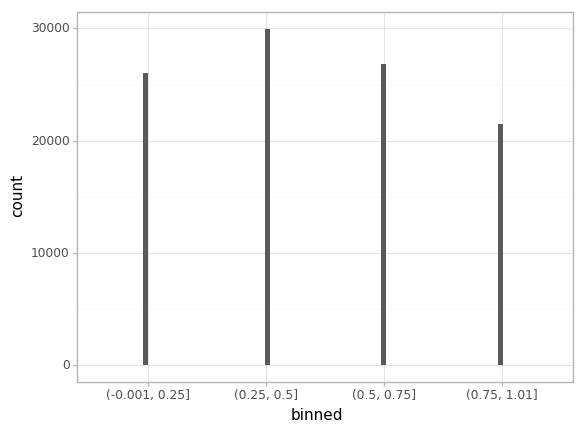

<ggplot: (-9223363296689318859)>

In [300]:
p = ggplot(aes(x='binned'), df)  + theme_light() 
p = p + geom_histogram() # + labs(ggtitle = "Scoping Information Loss")
p
#p + geom_text(aes(check_overlap=True), sample, size = 10) + geom_label(sample) 

In [160]:
sample = df['txt'].sample(10)
sample

12665                bim:magazine
65800    nonresistance:resistance
30062          electroshock:shock
85270                      sil:oh
20824     coformulated:formulated
73834                   posse:unk
61099      misfortunes:misfortune
1079                   1923:three
24804                    dave:unk
47642                  ishak:talk
Name: txt, dtype: object

messerschmitt schmidt
messersmith smith
messes methods
messiaen unk
messiaens in


Text(0.5,1,'Information Lost per Word Rank')

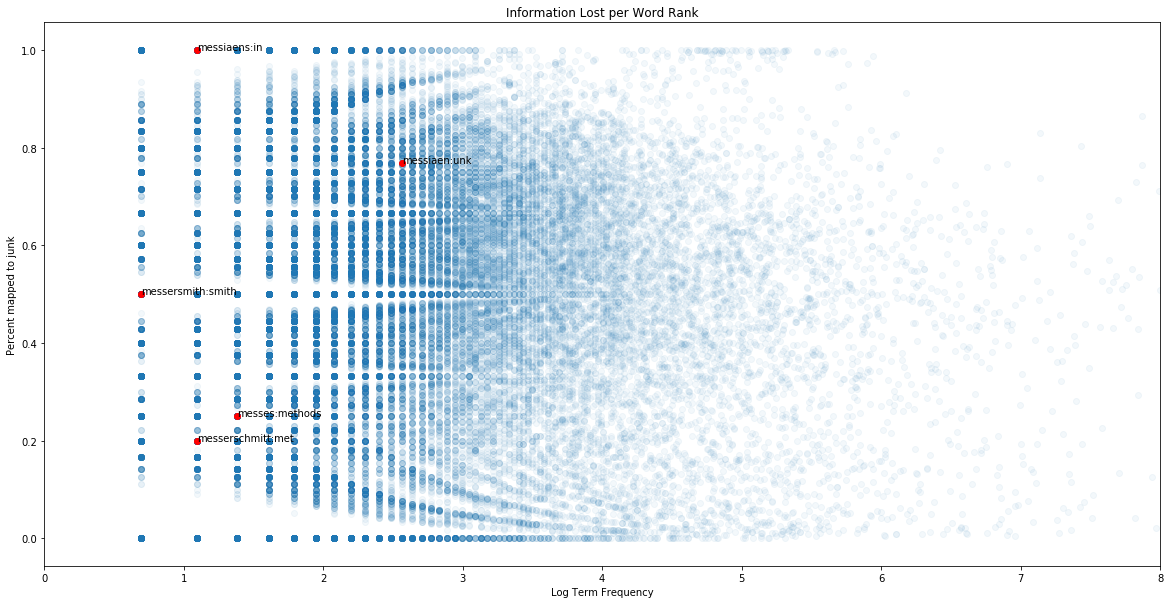

In [197]:
start_index = 60000
end_index = 60005

plt.figure(figsize=(20,10))
plt.scatter(np.log(select_term_frequencies), select_array_of_junk_translations, alpha=0.05, )
plt.xlabel('Log Term Frequency')
plt.scatter(x=np.log(select_term_frequencies[start_index:end_index]), y=select_array_of_junk_translations[start_index:end_index], c='r')
for i, txt in enumerate(select_vocab[start_index:end_index]):
    print (txt,  max(tpm[txt]))
    #print(tpm[txt])
    #print (max(tpm[txt], key=tpm['coalition'].get))
    i = i+start_index
    plt.annotate(txt +':'+ max(tpm[txt], key=tpm[txt].get), (np.log(select_term_frequencies)[i], select_array_of_junk_translations[i]))
plt.xlim(left = 0, right = 8)
plt.ylabel('Percent mapped to junk')
plt.title('Information Lost per Word Rank')

In [123]:
max(tpm['coalfield'], key=tpm['coalfield'].get)
tpm['coalfield']
#max(tpm['coalfield'], key=tpm['coalition'].get)

defaultdict(float,
            {'chamber': 0.2,
             'cornfield': 0.2,
             'declared': 0.2,
             'field': 0.2,
             'reeks': 0.2})

In [62]:
print(term_frequencies[0][:100])
print(array_of_junk_translations[0:100])

[  17 1248    4    1    1    1    2    6    1    4    3    1    1    8
    1    3    1    1    1    4    1    1    1   13   10    2    1    1
    1    3    2    1    9    2    1    2    5    1    1    1    1    1
    5    1    1    1    6    1    1    1    8    6    2    2    1    1
    1    1    1    1    1    1    1    1    4  507  102    1    6    1
    2    2    1    1    2    1    2    1    1    1    1    2   14   39
    3    1    1    1    5    1    4    2    1    2   11   21    3    3
    4    4]
[0.        0.0014706 0.0037477 0.0074791 0.        0.0159374 0.
 0.0012484 0.        0.0052609 0.        0.        0.        0.
 0.0067734 0.0286615 0.        0.0336581 0.        0.        0.0025773
 0.        0.        0.        0.0015773 0.0061412 0.        0.
 0.        0.0038023 0.0062461 0.        0.0044586 0.0005914 0.0037334
 0.        0.        0.        0.        0.        0.        0.0128205
 0.        0.        0.        0.        0.0095694 0.0060203 0.0119048
 0.        0.  

In [32]:
from collections import Counter

c = Counter([w for s in data for w in s.strip().split()])

In [33]:
term_frequencies, junk_translations = [], []
for w, count in tqdm(c.items()):
    term_frequencies.append(count)
    junk_translations.append(get_junk_translations(w, tpm, count))

term_frequencies, junk_translations = np.array(term_frequencies), np.array(junk_translations)

100%|██████████| 263271/263271 [00:03<00:00, 81612.01it/s]
